# Final assignment for Data Visualization with Python (SS22-MAID)
## Matriculation Number: 12201789


## Part - A
## Visualization Exercise - 1

Here, three alternative visualizations of the same artificial data is created. All plots display fictitious genomic annotations together with fictitious RNA binding protein data. For this, two different datasets are provided:

* *10_project_data_annotations.csv*
* *10_project_data_signals.csv*


### Visualization - I

In [1]:
#importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

*10_project_data_annotations.csv* : contains fictitious genomic information as visualized in all bottom panels of the plots. 

*10_project_data_signals.csv* : contains fictitious signals of four RNA binding proteins (P1, P2, P3, P4).

In [2]:
#loading the datasets
Genomic_info = pd.read_csv('Dataset/10_project_data_annotation.csv')
RNA_Protein = pd.read_csv('Dataset/10_project_data_signals.csv')

In [3]:
Genomic_info

,name,type,start,stop,strand
0,geneA,transcript,2000,7764,+
1,geneA,exon,2700,5100,+
2,geneA,exon,6000,6800,+
3,geneB,transcript,9000,12720,-
4,geneB,exon,9900,10100,-
5,geneB,exon,11000,11500,-
6,geneB,exon,11900,12450,-
7,geneC,transcript,14850,18000,+
8,geneC,exon,15700,17090,+


In [4]:
RNA_Protein

,P1,P2,P3,P4
0,0.28,0.14,0.19,0.19
1,0.30,0.16,0.17,0.20
2,0.26,0.13,0.20,0.12
3,0.21,0.13,0.25,0.15
4,0.31,0.03,0.24,0.20
...,...,...,...,...
19995,0.27,0.13,0.27,0.13
19996,0.24,0.16,0.20,0.09
19997,0.23,0.19,0.18,0.14
19998,0.25,0.10,0.17,0.09


In [5]:
#list of type "transcript" with start, stop and Strand type for plotting transcript of Genes A, B, & C
typeTranscript = Genomic_info[Genomic_info['type'].str.contains('transcript')]
typeTranscript = typeTranscript[['start','stop','strand']]
typeTranscript

,start,stop,strand
0,2000,7764,+
3,9000,12720,-
7,14850,18000,+


In [6]:
#Difference of Start and Stop is required to plot broken bars
Genomic_info['diff'] = Genomic_info['stop'] - Genomic_info['start']  
#list of Exon with strands of Gene A, B, & C
typeExon = Genomic_info[Genomic_info['type'].str.contains('exon')]
typeExon = typeExon[['start', 'diff', 'strand']]
typeExon

,start,diff,strand
1,2700,2400,+
2,6000,800,+
4,9900,200,-
5,11000,500,-
6,11900,550,-
8,15700,1390,+


#### Plotting the prepared data in required format.

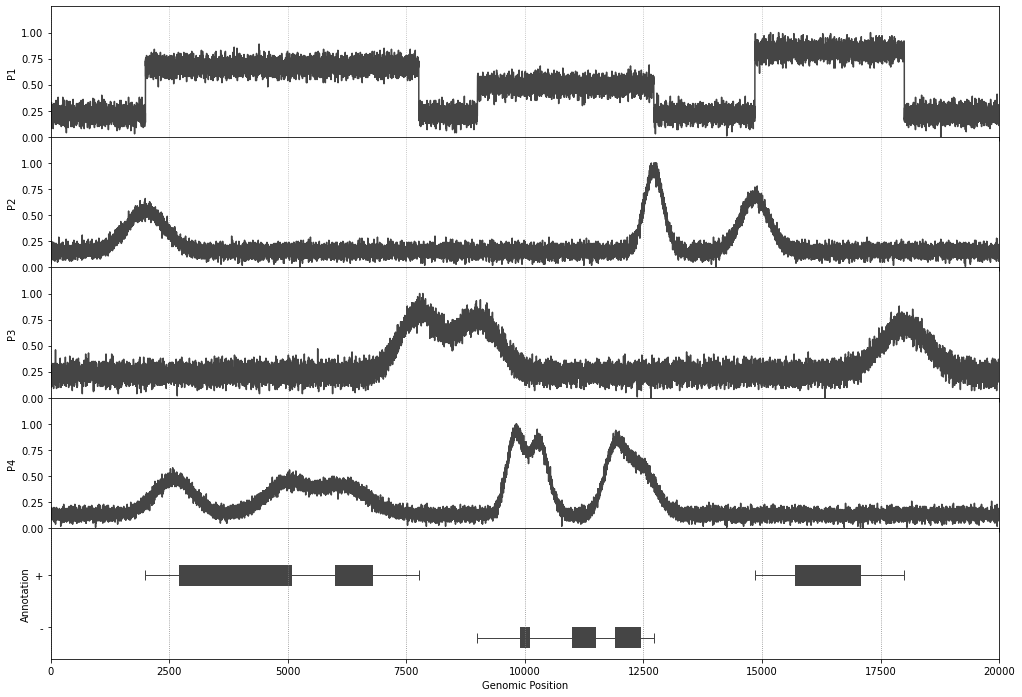

In [7]:
#Plotting the first version
fig, axs = plt.subplots(5, 1, sharex=True)

fig.set_size_inches(17,12)
fig.subplots_adjust(hspace=0) #Remove horizontal space between axes

i=0
t = np.arange(0, 20000, 1) # setting the range for x-axis

#Plotting RNA_Protein data in different subplots
for P in RNA_Protein.columns:
    axs[i].plot(t, RNA_Protein[[P]], color='#454545')
    axs[i].set_yticks(np.arange(0.0, 1.25, 0.25))   
    axs[i].set_ylim(0, 1.25)                        
    axs[i].xaxis.grid(linestyle=':')                
    axs[i].set_ylabel(P)                            #set y-axis label
    i += 1                                          #increment i to move to next subplot

#For plotting Genomic Annotation, first plotting transcripts
#check if Strand is '+' or '-' then choose y-axis setpoint for strand as 0.8 & for '-' y = 0.2
for rows in range(len(typeTranscript)):
    if typeTranscript.iloc[rows,2] == '+':        
        y = 0.8
    elif typeTranscript.iloc[rows,2] == '-':
        y = 0.2
    verts = [(typeTranscript.iloc[rows,0], y), (typeTranscript.iloc[rows,1], y)]
    xs, ys = zip(*verts)
    axs[i].plot(xs, ys, '|-', lw=1, color='#454545', ms=10)
    
axs[i].set_ylim(0, 1.25)                 
axs[i].set_xlim(0, 20000)                
axs[i].set_xlabel('Genomic Position')    # x-axis label
axs[i].set_ylabel('Annotation')          # y-axis label for Genomic Annotation Plot
axs[i].set_yticks([0.3, 0.8])            # y-axis set points for strands + and -
axs[i].set_yticklabels(['-', '+'])       # y-axis labels
axs[i].xaxis.grid(linestyle=':', color = "grey")         # vertical grid line style

#Next, plotting Exon data
for rows in range(len(typeExon)):
    if typeExon.iloc[rows,2] == '+':
        y = 0.7         #set y-axis point for the bars
        height = 0.2    #thickness of bar 
    elif typeExon.iloc[rows,2] == '-':
        y = 0.1        #set y-axis point for the bars
        height = 0.2    #set thickness of bar 
    axs[i].broken_barh([(typeExon.iloc[rows,0], typeExon.iloc[rows,1])], (y, height), facecolors='#454545')

plt.show()

* First three subplots represents the fictitious signals of four RNA binding proteins (P1, P2, P3, P4).
* Each horizontal line represents a transcript. A transcript can contain multiple exons (grey rectangles). Transcripts can be located on the '+' or on the '-' strand of the DNA.

### Visualization - II

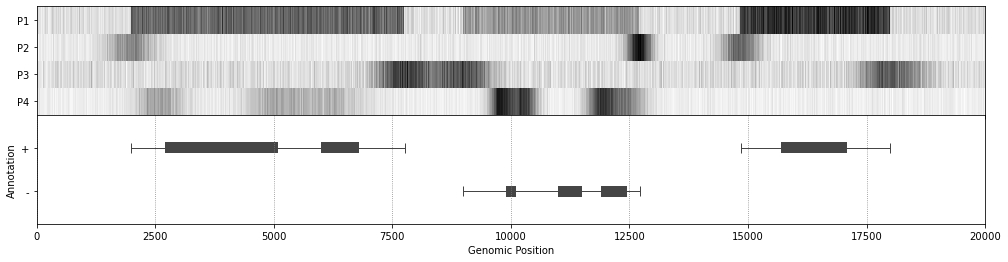

In [8]:
#plotting the second version
fig, axs = plt.subplots(2, 1, sharex=True)

fig.set_size_inches(17,4)
fig.subplots_adjust(hspace=0)

#Re-intialize i=0
i = 0

#Reorder Coloumns in RNA Binding Data to P4, P3, P2, P1 for Ploting
RNA_Protein_new = RNA_Protein[['P4', 'P3', 'P2', 'P1']]

#Plot Protein data in different subplots
RNA_Protein_new = np.transpose(RNA_Protein_new) #Transpose Protein Strands to match dimensions while using pcolormesh

x = np.arange(-0.5, 20000, 1)  # length = 20001
y = np.arange(-0.5, 4.5, 1)  # length = 5

axs[i].pcolormesh(x, y, RNA_Protein_new, cmap='Greys')     #Plot color map
axs[i].set_yticks([0.0, 1.0, 2.0, 3.0])           
axs[i].set_yticklabels(['P4', 'P3', 'P2', 'P1'])   # y-axis labels

#increment i=1 to plot next subplot
i += 1

#For plotting Genomic Annotation, first plotting transcripts
for rows in range(len(typeTranscript)):
    if typeTranscript.iloc[rows,2] == '+':        
        y = 0.7
    elif typeTranscript.iloc[rows,2] == '-':
        y = 0.3
    verts = [(typeTranscript.iloc[rows,0], y), (typeTranscript.iloc[rows,1], y)]
    xs, ys = zip(*verts)
    axs[i].plot(xs, ys, '|-', lw=1, color='#454545', ms=10)

    
axs[i].set_ylim(0, 1)                    
axs[i].set_xlim(0, 20000)                
axs[i].set_xlabel('Genomic Position')    # x-axis label
axs[i].set_ylabel('Annotation')          # y-axis label for Genomic Annotation Plot
axs[i].set_yticks([0.3, 0.7])            # y-axis set points for strands + and -
axs[i].set_yticklabels(['-', '+'])       # y-axis labels
axs[i].xaxis.grid(linestyle=':', color = "grey")         # vertical grid line style

#Next, plotting Exon data
for rows in range(len(typeExon)):
    if typeExon.iloc[rows,2] == '+':
        y = 0.65            #set y-axis point for the bars
        height = 0.1        #set thickness of bar 
    elif typeExon.iloc[rows,2] == '-':
        y = 0.25           #set y-axis point for the bars
        height = 0.1       #set thickness of bar for 0.1 units
    axs[i].broken_barh([(typeExon.iloc[rows,0], typeExon.iloc[rows,1])], (y, height), facecolors='#454545')

plt.show()

### Visualization - III

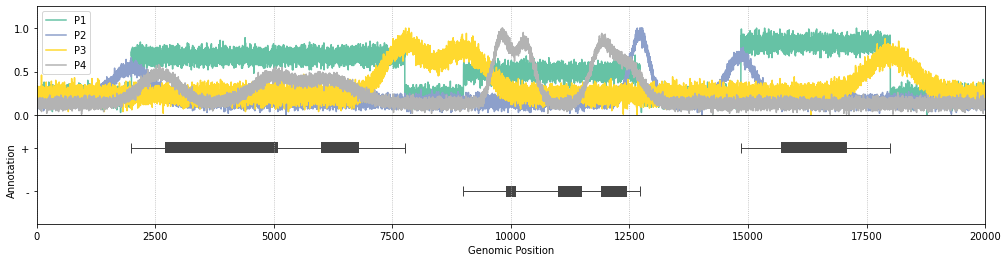

In [9]:
#plotting the third version
fig, axs = plt.subplots(2, 1, sharex=True)

fig.set_size_inches(17,4)
fig.subplots_adjust(hspace=0)

#colors for the plot
colorSet = {'P1' : '#66c2a5', 'P2' : '#8da0cb', 'P3' : '#ffd92f', 'P4' : '#b3b3b3'}

#Plotting RNA_Protein data in different subplots
for P in RNA_Protein.columns:
    #Re-initialize i to 0
    i = 0
    axs[i].plot(t, RNA_Protein[[P]], label=P ,color = colorSet[P] )
    axs[i].set_yticks(np.arange(0.0, 1.25, 0.5))           
    axs[i].set_ylim(0, 1.25)                               
    axs[i].xaxis.grid(linestyle=':')                       
    axs[i].legend(loc='upper left')   #add legends to the plot
    i += 1                                                 #increment i to move to next subplot

#For plotting Genomic Annotation, first plotting transcripts
for rows in range(len(typeTranscript)):
    if typeTranscript.iloc[rows,2] == '+':        
        y = 0.7
    elif typeTranscript.iloc[rows,2] == '-':
        y = 0.3
    verts = [(typeTranscript.iloc[rows,0], y), (typeTranscript.iloc[rows,1], y)]
    xs, ys = zip(*verts)
    axs[i].plot(xs, ys, '|-', lw=1, color='#454545', ms=10)
    
axs[i].set_ylim(0, 1)                    
axs[i].set_xlim(0, 20000)                
axs[i].set_xlabel('Genomic Position')    # x-axis label
axs[i].set_ylabel('Annotation')          # y-axis label for Genomic Annotation Plot
axs[i].set_yticks([0.3, 0.7])            # y-axis set points for strands + and -
axs[i].set_yticklabels(['-', '+'])       # y-axis labels
axs[i].xaxis.grid(linestyle=':')         

#Next, plotting Exon data
for rows in range(len(typeExon)):
    if typeExon.iloc[rows,2] == '+':
        y = 0.65            #set y-axis point from where the bar fills based on Strand
        height = 0.1        #set thickness of bar for 0.1 units
    elif typeExon.iloc[rows,2] == '-':
        y = 0.25           #set y-axis point from where the bar fills based on Strand
        height = 0.1       #set thickness of bar for 0.1 units
    axs[i].broken_barh([(typeExon.iloc[rows,0], typeExon.iloc[rows,1])], (y, height), facecolors='#454545')

plt.show()

###  Discussion
Discuss the pros and cons between the three different visualization approaches.

#### Visualization - I

Pros:
    
   * All the RNA bining proteins can be seen properly in individual plots.It gives better understanding and easy sharing of data.
   * The position and changing of each protein can be seen by looking at the pattern.Trends in the pattern can be easily seen.

Cons:
    
   * We had just 4 proteins. if we have a list of 100 proteins then the graph will be difficult to interpret.
   * It is taking a lot of space.Woking with more protein will make the graph uncessarily big .

#### Visualization - II


Pros:
    
   * The graph is very concise and precise and easy to interpret.On which RNA position signals for proteins are high can be easily vizualize.
    
Cons:
    
   * It gives us qualitative information and not quantitative.Precise protein signals cant be derived from it but it can be seen when the signals are high and when it is low.
    
#### Visualization - III

Pros:
    
   * It takes up very less space and all protein signals can be seen all at the same time in a single plot

Cons:
    
   * All the graphs are in same plot so it is difficult to read.If we have say 10 proteins or more individual graphs are difficult to visualize.
    
    

## Visualization Exercise - 2

In this task, two additional plots shall be added to create a bigger figure. 
Two additional datasets are provided:

* 10_project_data_scatter.csv contains the data needed to create the shown scatter plot
* 10_project_data_barplot.csv contains the data needed to create the shown bar plot.

In [10]:
#loading the data
dataScatter = pd.read_csv('Dataset/10_project_data_scatter.csv')
dataBarplot = pd.read_csv('Dataset/10_project_data_barplot.csv')

In [11]:
dataScatter

,x1,x2
0,8.41,5.43
1,9.56,3.92
2,10.83,1.80
3,11.14,2.32
4,11.41,1.41
...,...,...
1995,8.76,1.49
1996,9.89,4.09
1997,10.60,4.36
1998,10.83,2.96


In [12]:
dataBarplot

,Unnamed: 0,condition_a_sample_1,condition_a_sample_2,control
0,XY,756,619,689
1,XZ,2411,2189,782
2,YX,577,821,689
3,YZ,743,781,719


#### Scatter Plot

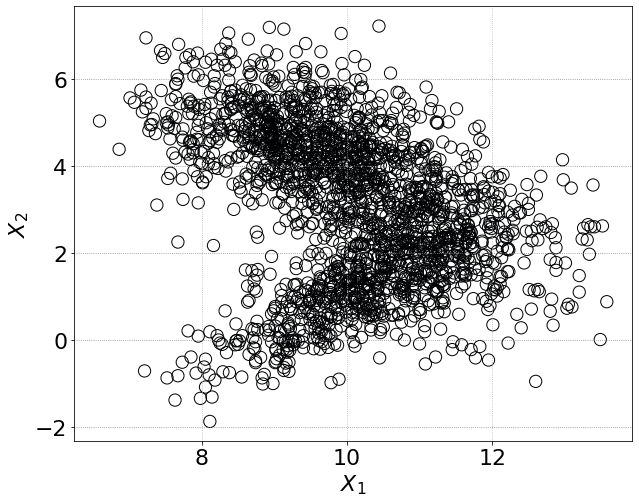

In [13]:
#increasing fontsize
plt.rcParams.update({'font.size': 22})
#plotting the scatter plot
fig, axs = plt.subplots()
fig.set_size_inches(10,8)

x1 = dataScatter['x1']
x2 = dataScatter['x2']

            
axs.set_xlabel('$X_1$')    
axs.set_ylabel('$X_2$')          
axs.set_xticks([8, 10,12])           
axs.set_xticklabels(['8', '10', '12'])      
axs.xaxis.grid(linestyle=':') 
axs.yaxis.grid(linestyle=':', color = "grey")


plt.scatter(x1, x2, s=150, alpha=1, facecolors='none', edgecolors='#010203')
plt.show()

#### Bar Plot

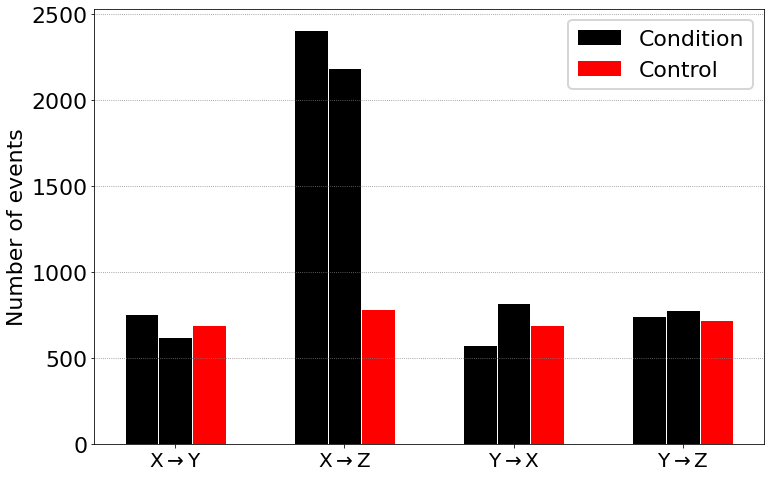

In [19]:
#plotting the barplot
fig, axs = plt.subplots()
fig.set_size_inches(12,8)

barWidth = 0.2

labels = [r'X$\rightarrow$Y', r'X$\rightarrow$Z', r'Y$\rightarrow$X', r'Y$\rightarrow$Z']
# set heights of bars
bars1 = dataBarplot['condition_a_sample_1']
bars2 = dataBarplot['condition_a_sample_2']
bars3 = dataBarplot['control']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
axs.bar(r1, bars1, color='black', width=barWidth, edgecolor='white', label='Condition')
axs.bar(r2, bars2, color='black', width=barWidth, edgecolor='white')
axs.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='Control')
 

axs.set_xticks([0.2, 1.2, 2.2, 3.2])     # Add xticks on the middle of the group bars      
axs.set_xticklabels(labels, fontsize = 20) 
axs.set_ylabel('Number of events') 
axs.yaxis.grid(linestyle=':', color = "grey")
axs.legend().get_frame().set_linewidth(2)



plt.show()

## 2: Text Exercise

#### Summarize the article *'Pencil and paper'* by Wong & Kjaergaard. What are the key points? Do not copy and paste from the article. Summarize in your own words.

In data visualization one need to understand the data and create various charts, graphs, and pictures that depict one's understanding of the data. The various effective tactics for understanding and showing our specific thinking can be words spoken through or written by us that will let others see things from the point we want to show them. In contrast to those tactics, the visualization and representation of data demand reasoning skills by scrutinizing our understanding or interpretation.

An example of intracellular protein is given to understand the vagueness of the word which is not expanded to pictures. In one case where the simple word of intracellular protein speaks about how the protein resides inside the cell, whereas in another if we want to depict the intracellular protein via pictures we need to show the exact compartments where the protein lies and it will give us more information and precise location of the protein and where it resides.

Evaluation is necessary for visual depiction for the establishment of our understanding. Some amount of visual inaccuracy is being demanded while taking pictures. Alternative ideas and conclusions may be generated and expose gaps in our ideas from quick doodling. Our constant efforts to make an object look like itself seek perfection and technical mastery which discourages people and eventually they give up drawing instead of exploring various new possibilities.

The pencil and paper approach provides an immediate medium to let our ideas flow. Computer software doesn't provide that flexibility in exploring ideas and often sticks to a learning curve that stops us from doing something when we are concerned about whether or not we are doing it in the right way. Thinking and drawing are interlinked processes where mindsets help us get different insights into the data. Drawing has been known as a cognitive process that improves scientific concepts and the performance of children from kindergarten.

Drawing helps us challenge our working memory. The visual attributes of various objects and their complex relationship are not easy to remember but creating a diagram can help us overcome this. 
An example of Ronald vale is given which proves the point that how sketching and drawing have contributed to science. Visualization is a creative scientific process connecting exploring, understanding, seeing, and thinking.